# Pymaceuticals Inc.
---

### Summary of Contents

- Prepare the Data 
  - The datasets are merged into a single DataFrame
  - The number of mice are shown from the merged DataFrame
  - Each duplicate mouse is found based on the Mouse ID and Timepoint
  - A clean DataFrame is created with the dropped duplicate mice
  - The number of mice are shown from the clean DataFrame
 - Generate Summary Statistics
    - The mean of the tumor volume for each regimen is calculated using groupby
    - The media of the tumor volume for each regimen is calculated using groupby
    - The variance of the tumor volume for each regimen is calculated using groupby
    - The standard deviation of the tumor volume for each regimen is calculated using groupby
    - The SEM of the tumor volume for each regimen is calculated using groupby
    - A new DataFrame is created with using the summary statistics
 - Create Bar Charts and Pie Charts
    - A bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
    - A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
    - A pie plot showing the distribution of female versus male mice using Pandas 
    - A pie plot showing the distribution of female versus male mice using pyplot 
 - Calculate Quartiles, Find Outliers, and Create a Box Plot
    - A DatFrame that has the last timepoint for each mouse ID is created using groupby
    - The index of the DataFrame is reset
    - Retrieve the maximum timepoint for each mouse
    - The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list
    - An empty list is created to fill with tumor volume data
    - A for loop is used to display the interquartile range (IQR) and the outliers for each treatment group
    - A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group
 - Create a Line Plot and a Scatter Plot 
    - A line plot is generated that shows the tumor volume vs. time point for one mouse treated with Capomulin
    - A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen
 - Calculate Correlation and Regression
    - The correlation coefficient and linear regression model are calculated for mouse weight and average tumor volume for the Capomulin regimen
    
### Observations
Based on final tumor volume, it appears that Ramicane is the most effective drug of the 4 drugs that were focused on. Ramicane was also the most effective drug overall based on mean. The least effective drug of all of the drugs based on mean is Ketapril. Based on this information, it would be advisable to stop trials of Ketapril and put more studies into the most effective drugs such as Ramicane and Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata , how="left")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_data_complete["Mouse ID"].unique()
len(mouse_count)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_tp = mouse_data_complete[mouse_data_complete[['Mouse ID', 'Timepoint']].duplicated() == True]
mouse_id_tp["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = mouse_id_tp["Mouse ID"].unique()

# Get all data for duplicate Mouse IDs
duplicate_mouse_data = mouse_data_complete[mouse_data_complete["Mouse ID"].isin(duplicate_mouse_ids)]

# Print the duplicate Mouse data
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete.drop(mouse_data_complete[mouse_data_complete['Mouse ID'] == 'g989'].index, inplace = True)
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = mouse_data_complete["Mouse ID"].unique()
len(mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data
grouped_data = mouse_data_complete.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and SEM
tumor_vol_mean = grouped_data['Tumor Volume (mm3)'].mean()
tumor_vol_median = grouped_data['Tumor Volume (mm3)'].median()
tumor_vol_var = grouped_data['Tumor Volume (mm3)'].var()
tumor_vol_std = grouped_data['Tumor Volume (mm3)'].std()
tumor_vol_sem = grouped_data['Tumor Volume (mm3)'].sem()

# Create a summary statistics table by assembling the series
drug_regimen_stats = pd.DataFrame({'Mean Tumor Volume': tumor_vol_mean,
                              'Median Tumor Volume': tumor_vol_median,
                              'Tumor Volume Variance': tumor_vol_var,
                              'Tumor Volume Std. Dev.': tumor_vol_std,
                              'Tumor Volume Std. Err.': tumor_vol_sem})
drug_regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

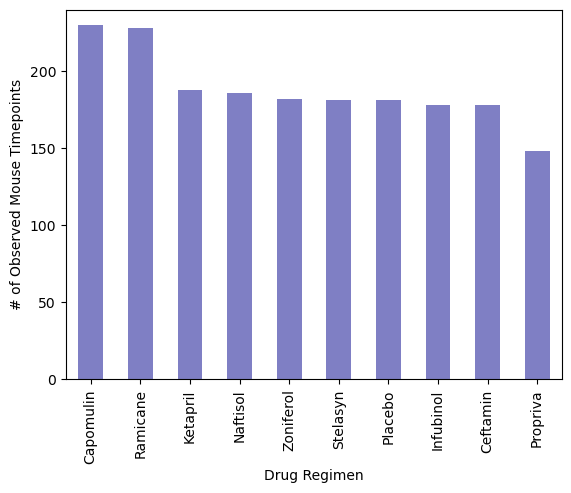

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#create the bar plot
regimen_counts = mouse_data_complete["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar", color="darkblue", alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.ylim([0, max(regimen_counts)+10])

#set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#display the plot
plt.show()

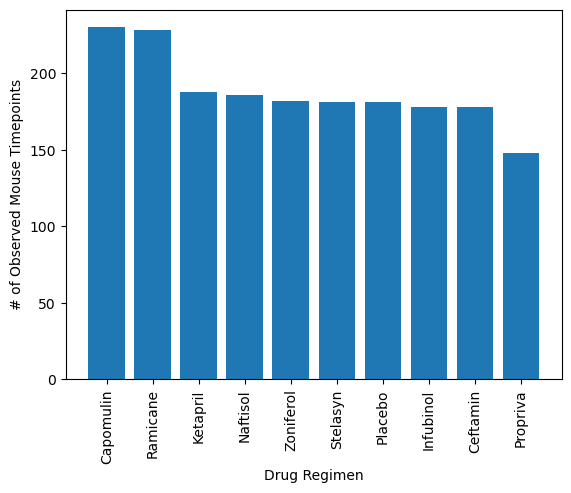

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#create a bar plot
plt.bar(regimen_counts.index, regimen_counts.values)

#set the labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#rotate x-axis labels vertically
plt.xticks(rotation='vertical')

#display the plot
plt.show()

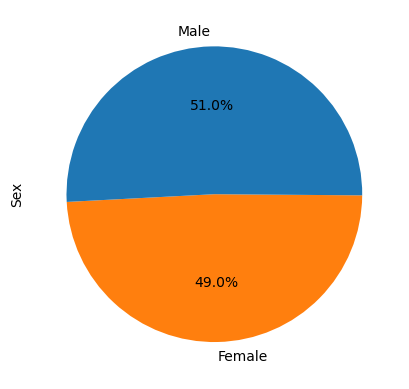

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#create a dataframe with the count of each sex
sex_count = mouse_data_complete.groupby('Sex')['Sex'].count()

#create a pie chart
sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=183, colors = ['#FF7F0E', '#1F77B4'])

#y-axis label
plt.ylabel('Sex')

#display the chart
plt.show()

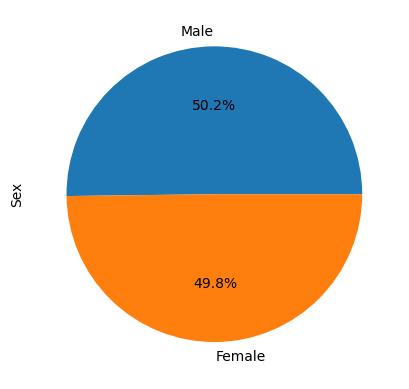

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#count the number of mice for each sex
sex_count = mouse_metadata['Sex'].value_counts()

#create a list of colors for the pie chart
colors = ['#1F77B4','#FF7F0E']

#create the pie chart
plt.pie(sex_count, labels=sex_count.index, colors=colors, autopct='%1.1f%%')

#y-axis label
plt.ylabel('Sex')

#show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor v# Labels for the sections of our pie chart

# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

treatment_df = mouse_data_complete[mouse_data_complete['Drug Regimen'].isin(treatment_list)]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = treatment_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

greatest_tp_df = pd.merge(last_timepoint, treatment_df, on=['Mouse ID', 'Timepoint'], how='left')

greatest_tp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == treatment].groupby('Mouse ID').\
        agg({'Timepoint': 'max'}).reset_index()
    tumor_vol_data = pd.merge(final_tumor_vol, mouse_data_complete, on=['Mouse ID', 'Timepoint'], how='left')['Tumor Volume (mm3)']
    # add subset 
    tumor_volumes.append(tumor_vol_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


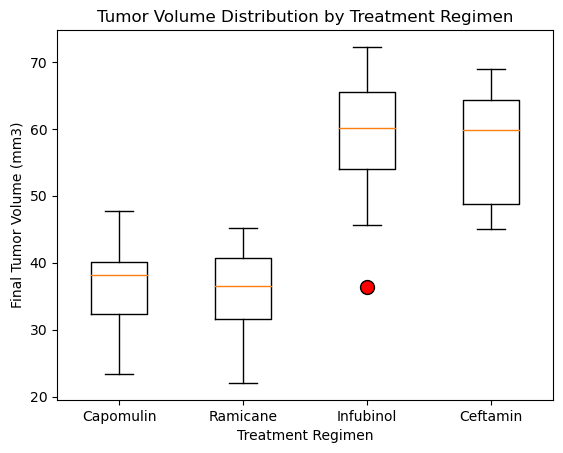

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

treatment_boxplot = tumor_volumes

# Set the title and labels
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Distribution by Treatment Regimen')
ax1.set_xlabel('Treatment Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')  

# Create, save and show the plot
plt.boxplot(treatment_boxplot, labels=treatments, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})  
plt.savefig("boxplot")   
plt.show()


## Line and Scatter Plots

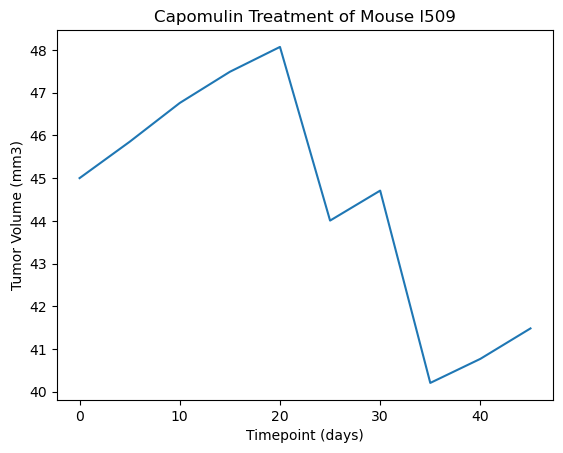

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin treatment and a single mouse ID
capomulin_data = mouse_data_complete[mouse_data_complete['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Plot the tumor volume vs. time point
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the plot title and labels
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


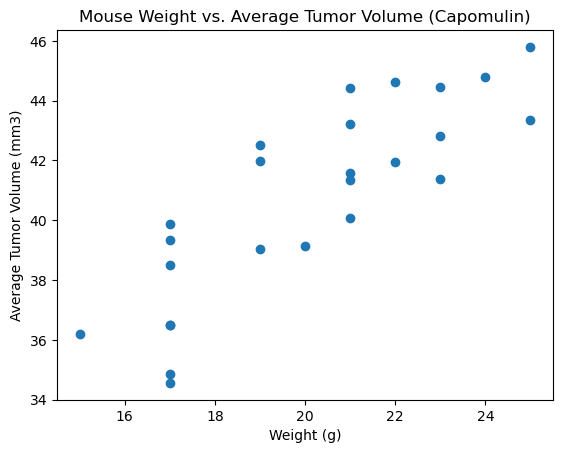

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the mouse weight data with the average tumor volume data
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Plot the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Set the plot title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


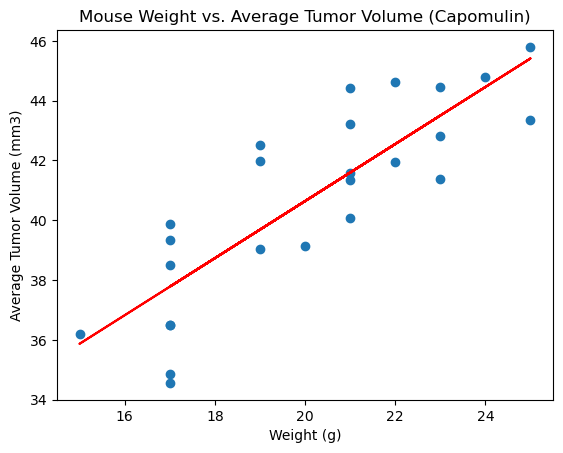

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = round(st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0],2)

# Create the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add the correlation line
slope, intercept, _, _, _ = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], line, color='red')

# Display the plot
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.show()